In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.finfo(np.float)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore', category = DeprecationWarning)
import nltk
from nltk import word_tokenize
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)

file = pd.read_csv(r'C:\Users\xuanx\Desktop\Steam_Reviews\steam_reviews.csv')

In [3]:
file['language'].value_counts()[:5]

english      9635437
schinese     3764967
russian      2348900
brazilian     837524
spanish       813320
Name: language, dtype: int64

In [4]:
#pick out english reviews only
df = file[file['language'] == 'english']

In [5]:
df['recommended'].value_counts()

True     8584444
False    1050993
Name: recommended, dtype: int64

In [6]:
#Checking review column for null values and removing them.
print(df.review.isnull().sum())
df1 = df[df.review.isnull()== False]

16750


In [7]:
df1

Unnamed: 0  app_id                  app_name  review_id language  \
3                  3  292030  The Witcher 3: Wild Hunt   85184605  english   
5                  5  292030  The Witcher 3: Wild Hunt   85184171  english   
6                  6  292030  The Witcher 3: Wild Hunt   85184064  english   
18                18  292030  The Witcher 3: Wild Hunt   85180436  english   
20                20  292030  The Witcher 3: Wild Hunt   85179753  english   
...              ...     ...                       ...        ...      ...   
21747364    21747369  546560           Half-Life: Alyx   65645167  english   
21747366    21747371  546560           Half-Life: Alyx   65645125  english   
21747367    21747372  546560           Half-Life: Alyx   65645115  english   
21747368    21747373  546560           Half-Life: Alyx   65645100  english   
21747369    21747374  546560           Half-Life: Alyx   65645066  english   

                                                     review  \
3         One of the best RPG's of all time, worthy of a...   
5                    good story, good graphics. lots to do.   
6                                                  dis gud,   
18        favorite game of all time cant wait for the Ne...   
20                                Why wouldn't you get this   
...                                                     ...   
21747364                                   best game ever\n   
21747366                                         Holy balls   
21747367  A tripod thing bears down on you, it looks imm...   
21747368             Honestly this is the best vr game ever   
21747369  Smooth turning is not working right now.\nIt a...   

          timestamp_created  timestamp_updated  recommended  votes_helpful  \
3                1611379970         1611379970         True              0   
5                1611379264         1611379264         True              0   
6                1611379091         1611379091         True              0   
18               1611373086         1611373086         True              0   
20               1611371978         1611371978         True              0   
...                     ...                ...          ...            ...   
21747364         1584986750         1584986750         True              0   
21747366         1584986704         1584986704         True              0   
21747367         1584986693         1584986693         True              0   
21747368         1584986673         1584986673         True              0   
21747369         1584986631         1586382422         True              0   

          votes_funny  weighted_vote_score  comment_count  steam_purchase  \
3                   0             0.000000              0            True   
5                   0             0.000000              0            True   
6                   0             0.000000              0            True   
18                  0             0.000000              0            True   
20                  0             0.000000              0            True   
...               ...                  ...            ...             ...   
21747364            0             0.000000              0            True   
21747366            0             0.000000              0            True   
21747367            0             0.000000              0           False   
21747368            0             0.474138              0            True   
21747369            0             0.386022             11            True   

          received_for_free  written_during_early_access     author.steamid  \
3                     False                        False  76561199054755373   
5                     False                        False  76561198170193529   
6                     False                        False  76561198119302812   
18                    False                        False  76561198065591528   
20                    False                        False  7

In [8]:
ts = int('1516762425')
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2018-01-24 02:53:45


In [9]:
df1['time'] = df1['timestamp_updated'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m'))

In [10]:
df1

Unnamed: 0  app_id                  app_name  review_id language  \
3                  3  292030  The Witcher 3: Wild Hunt   85184605  english   
5                  5  292030  The Witcher 3: Wild Hunt   85184171  english   
6                  6  292030  The Witcher 3: Wild Hunt   85184064  english   
18                18  292030  The Witcher 3: Wild Hunt   85180436  english   
20                20  292030  The Witcher 3: Wild Hunt   85179753  english   
...              ...     ...                       ...        ...      ...   
21747364    21747369  546560           Half-Life: Alyx   65645167  english   
21747366    21747371  546560           Half-Life: Alyx   65645125  english   
21747367    21747372  546560           Half-Life: Alyx   65645115  english   
21747368    21747373  546560           Half-Life: Alyx   65645100  english   
21747369    21747374  546560           Half-Life: Alyx   65645066  english   

                                                     review  \
3         One of the best RPG's of all time, worthy of a...   
5                    good story, good graphics. lots to do.   
6                                                  dis gud,   
18        favorite game of all time cant wait for the Ne...   
20                                Why wouldn't you get this   
...                                                     ...   
21747364                                   best game ever\n   
21747366                                         Holy balls   
21747367  A tripod thing bears down on you, it looks imm...   
21747368             Honestly this is the best vr game ever   
21747369  Smooth turning is not working right now.\nIt a...   

          timestamp_created  timestamp_updated  recommended  votes_helpful  \
3                1611379970         1611379970         True              0   
5                1611379264         1611379264         True              0   
6                1611379091         1611379091         True              0   
18               1611373086         1611373086         True              0   
20               1611371978         1611371978         True              0   
...                     ...                ...          ...            ...   
21747364         1584986750         1584986750         True              0   
21747366         1584986704         1584986704         True              0   
21747367         1584986693         1584986693         True              0   
21747368         1584986673         1584986673         True              0   
21747369         1584986631         1586382422         True              0   

          votes_funny  weighted_vote_score  comment_count  steam_purchase  \
3                   0             0.000000              0            True   
5                   0             0.000000              0            True   
6                   0             0.000000              0            True   
18                  0             0.000000              0            True   
20                  0             0.000000              0            True   
...               ...                  ...            ...             ...   
21747364            0             0.000000              0            True   
21747366            0             0.000000              0            True   
21747367            0             0.000000              0           False   
21747368            0             0.474138              0            True   
21747369            0             0.386022             11            True   

          received_for_free  written_during_early_access     author.steamid  \
3                     False                        False  76561199054755373   
5                     False                        False  76561198170193529   
6                     False                        False  76561198119302812   
18                    False                        False  76561198065591528   
20                    False                        False  7

In [11]:
eagameslist = df1[df1['written_during_early_access'] == True]
eagameslist

Unnamed: 0  app_id    app_name  review_id language  \
2404043      2404044  264710  Subnautica   39571818  english   
2404055      2404056  264710  Subnautica   39571782  english   
2404058      2404059  264710  Subnautica   39571757  english   
2404059      2404060  264710  Subnautica   39571681  english   
2404060      2404061  264710  Subnautica   39571659  english   
...              ...     ...         ...        ...      ...   
21651423    21651428  598330  SimAirport   30411232  english   
21651424    21651429  598330  SimAirport   30410724  english   
21651425    21651430  598330  SimAirport   30410293  english   
21651427    21651432  598330  SimAirport   30409210  english   
21651431    21651436  598330  SimAirport   30403524  english   

                                                     review  \
2404043                                       1.0 woooooooo   
2404055   AMAZING. i'm not saying anything because spoil...   
2404058                                       Boi it's out!   
2404059   Amazing game and i would encourage anyone with...   
2404060   This game is Phenominal, bringing us so many c...   
...                                                     ...   
21651423  TL;DR\nThe game is still very early access and...   
21651424  complete rip off of prison architect and exter...   
21651425                    Way too Buggy to play right now   
21651427  This game started out junk. It sure isn't now....   
21651431  I was a big prison architect fan but didnt rea...   

          timestamp_created  timestamp_updated  recommended  votes_helpful  \
2404043          1516762425         1516762425         True              0   
2404055          1516762320         1516762349         True              1   
2404058          1516762217         1516762217         True              0   
2404059          1516761967         1516761967         True              0   
2404060          1516761840         1516761840         True              0   
...                     ...                ...          ...            ...   
21651423         1489077572         1489077615         True              0   
21651424         1489075574         1489075574        False              1   
21651425         1489074028         1489074028        False              4   
21651427         1489070104         1506709615         True              2   
21651431         1489039782         1489053729         True              3   

          votes_funny  weighted_vote_score  comment_count  steam_purchase  \
2404043             0             0.000000              0            True   
2404055             0             0.523810              0            True   
2404058            20             0.000000              0            True   
2404059             0             0.000000              0            True   
2404060             0             0.000000              0           False   
...               ...                  ...            ...             ...   
21651423            0             0.472441              0            True   
21651424            0             0.458599              4            True   
21651425            1             0.479563              0            True   
21651427            0             0.536344              3            True   
21651431            0             0.534299              1            True   

          received_for_free  written_during_early_access     author.steamid  \
2404043               False                         True  76561198074981096   
2404055               False                         True  76561198171115998   
2404058               False                         True  76561198007501609   
2404059               False                         True  76561198211112929   
2404060                True                         True  76561198332343749   
...                     ...                          ...                ...   
21651423              False                         True  76561198023

In [12]:
eagameslist1 = eagameslist['app_name'].value_counts().to_frame()
eagameslist1 = eagameslist1.index.to_list()
eagameslist1

['Phasmophobia',
 "PLAYERUNKNOWN'S BATTLEGROUNDS",
 'Rust',
 'ARK: Survival Evolved',
 'Factorio',
 'Raft',
 'The Forest',
 'BeamNG.drive',
 'Totally Accurate Battle Simulator',
 'Satisfactory',
 'Subnautica',
 'Deep Rock Galactic',
 'SCUM',
 'ATLAS',
 'Ravenfield',
 'Hunt: Showdown',
 'Wallpaper Engine',
 'RimWorld',
 'Black Mesa',
 'Hades',
 "Don't Starve Together",
 'Slay the Spire',
 'Beat Saber',
 'Conan Exiles',
 'Oxygen Not Included',
 'Blackwake',
 'Slime Rancher',
 'Dead Cells',
 'They Are Billions',
 'Golf It!',
 'Darkest Dungeon®',
 'ULTRAKILL',
 'Broforce',
 'Bless Online',
 'Townscaper',
 'BATTALION 1944',
 'Northgard',
 'Kenshi',
 'Foundation',
 'Eco',
 'Streets of Rogue',
 'Avorion',
 'My Time At Portia',
 'Freeman: Guerrilla Warfare',
 'Youtubers Life',
 'PC Building Simulator',
 'Nova Drift',
 'Pit People',
 'Nether',
 'Stay Out',
 'Due Process',
 'Divinity: Original Sin 2',
 'Day of Infamy',
 'SOS',
 'PixARK',
 'Tabletop Simulator',
 'SimAirport',
 'RollerCoaster Tyco

In [13]:
eagames = df1.loc[(df1['app_name'].isin(eagameslist1))]

In [14]:
pd.set_option('display.max_rows', None)
eagames1 = eagames.groupby(['app_name', 'written_during_early_access'])['recommended'].value_counts()


In [21]:
eagames1

app_name                           written_during_early_access  recommended
20XX                               False                        True             1508
                                                                False             122
                                   True                         True              920
                                                                False              42
ARK: Survival Evolved              False                        True            93196
                                                                False           21457
                                   True                         True            45316
                                                                False           24328
ATLAS                              True                         False           10169
                                                                True             9442
Avorion                            False                        

In [28]:
example = df1[df1['app_name'] == '20XX']

example

Unnamed: 0  app_id app_name  review_id language  \
3606375     3606376  322110     20XX   84645192  english   
3606376     3606377  322110     20XX   84630141  english   
3606377     3606378  322110     20XX   84580809  english   
3606378     3606379  322110     20XX   84524803  english   
3606384     3606385  322110     20XX   84315406  english   
3606387     3606388  322110     20XX   84155742  english   
3606388     3606389  322110     20XX   84088133  english   
3606389     3606390  322110     20XX   84085065  english   
3606390     3606391  322110     20XX   83994873  english   
3606392     3606393  322110     20XX   83907647  english   
3606395     3606396  322110     20XX   83720697  english   
3606398     3606399  322110     20XX   83621767  english   
3606399     3606400  322110     20XX   83616976  english   
3606400     3606401  322110     20XX   83612369  english   
3606401     3606402  322110     20XX   83604280  english   
3606402     3606403  322110     20XX   83551275  english   
3606403     3606404  322110     20XX   83441802  english   
3606404     3606405  322110     20XX   83406744  english   
3606405     3606406  322110     20XX   83319175  english   
3606407     3606408  322110     20XX   83273281  english   
3606408     3606409  322110     20XX   83262854  english   
3606409     3606410  322110     20XX   83243005  english   
3606410     3606411  322110     20XX   83218560  english   
3606415     3606416  322110     20XX   83134803  english   
3606416     3606417  322110     20XX   83049824  english   
3606417     3606418  322110     20XX   83025525  english   
3606418     3606419  322110     20XX   83018974  english   
3606419     3606420  322110     20XX   83002544  english   
3606420     3606421  322110     20XX   82892949  english   
3606421     3606422  322110     20XX   82880208  english   
3606422     3606423  322110     20XX   82844258  english   
3606423     3606424  322110     20XX   82795514  english   
3606428     3606429  322110     20XX   82638858  english   
3606430     3606431  322110     20XX   82541153  english   
3606431     3606432  322110     20XX   82464428  english   
3606432     3606433  322110     20XX   82453376  english   
3606434     3606435  322110     20XX   82247997  english   
3606435     3606436  322110     20XX   82241157  english   
3606436     3606437  322110     20XX   82218760  english   
3606437     3606438  322110     20XX   82216750  english   
3606439     3606440  322110     20XX   82145183  english   
3606441     3606442  322110     20XX   82128124  english   
3606442     3606443  322110     20XX   82114638  english   
3606443     3606444  322110     20XX   82024609  english   
3606444     3606445  322110     20XX   81992829  english   
3606447     3606448  322110     20XX   81913052  english   
3606448     3606449  322110     20XX   81899486  english   
3606449     3606450  322110     20XX   81882938  english   
3606452     3606453  322110     20XX   81800477  english   
3606454     3606455  322110     20XX   81789270  english   
3606461     3606462  322110     20XX   81752525  english   
3606462     3606463  322110     20XX   81733489  english   
3606466     3606467  322110     20XX   81706203  english   
3606469     3606470  322110     20XX   81682507  english   
3606470     3606471  322110     20XX   81675117  english   
3606472     3606473  322110     20XX   81668331  english   
3606474     3606475  322110     20XX   81659041  english   
3606475     3606476  322110     20XX   81648713  english   
3606476     3606477  322110     20XX   81644384  english   
3606478     3606479  322110     20XX   81625980  english   
3606479     3606480  322110     20XX   81616966  english   
3606481     3606482  322110     20XX   81611658  english   
3606483     3606484  322110     20XX   81602111  english   
3606485     3606486  322110     20XX   81594406  english   
3606489     3606490  322110     20XX   81549462  english   
3606490     3606491  322110     20XX   81534727  

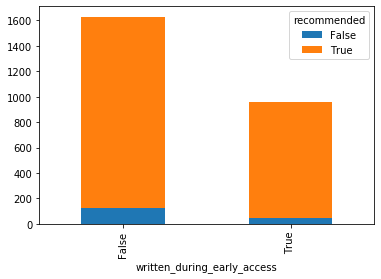

In [31]:
stackex = example.groupby(['recommended','written_during_early_access']).size().reset_index().pivot(columns = 'recommended', index = 'written_during_early_access', values = 0 )
stackex

stackex.plot(kind = 'bar', stacked = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 68 Text xticklabel objects>)

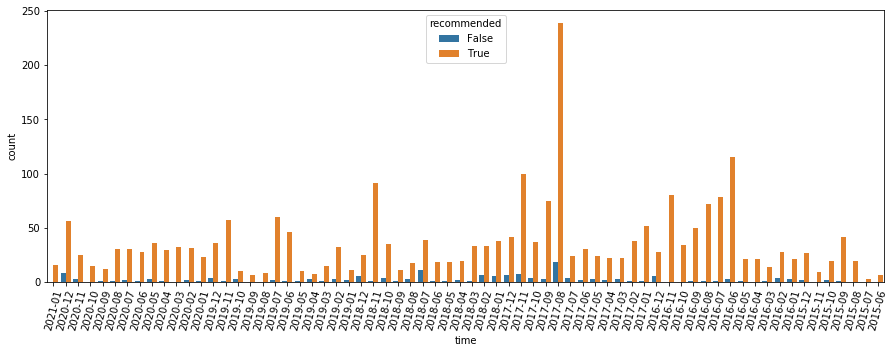

In [32]:
example.groupby('time')
plt.figure(figsize = (15,5))
sns.countplot(data = example, x = 'time', hue = 'recommended')
plt.xticks(rotation = 75)


In [ ]:
games_list = df['app_name'].value_counts().to_frame()
print(games_list.index.to_frame())

In [ ]:
games_list_20 = games_list.sample(frac=0.03, random_state = 40)
games_list_20.shape

In [ ]:
games_list_20_list = games_list_20.index.tolist()
df_20 = df.loc[(df['app_name'].isin(games_list_20_list))]

In [ ]:
df_20.shape

In [ ]:
df_20['app_name'].value_counts()

In [ ]:
print(games_list_20_list)

In [ ]:
df_20['recommended'].value_counts()

In [ ]:
#df_20_20 = df_20.sample(frac = 0.1)
df_20_20 = df_20.sample(frac = 0.1)
#df_20_20['recommended'].value_counts()
#df_20_20 = df_20

In [ ]:
df_20_20.review = df_20_20.review.astype(str)

In [ ]:
import string
import re

In [ ]:
#Convert text to lowercase and removing punctuation 

def remove_punct(txt):
    text_input = "".join([char for char in txt if char not in string.punctuation])
    return text_input

df_20_20['token_review'] = df_20_20['review'].apply(lambda x: remove_punct(x.lower()))

In [ ]:
#remove numbers

def remove_digits(txt):
    return re.sub(r' \d+', '', str(txt))

df_20_20['token_review1'] = df_20_20['token_review'].apply(lambda x: remove_digits(x))

In [ ]:
#remove non alphabet characters

def remove_chars(txt):
    return re.sub("[^a-zA-Z]+", ' ', txt)

df_20_20['token_review2'] = df_20_20['token_review1'].apply(lambda x: remove_chars(x))

In [ ]:
#Convert reviews into tokens

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df_20_20['token_review3'] = df_20_20['token_review2'].apply(lambda x: tokenize(x))

In [ ]:
#remove stopwords

stopword = nltk.corpus.stopwords.words('english')

def rem_stopwords(txt):
    text = [word for word in txt if word not in stopword]
    return text

df_20_20['token_review4'] = df_20_20['token_review3'].apply(lambda x: rem_stopwords(x))
    

In [ ]:
#convert words to base form 
wn = nltk.WordNetLemmatizer()

def lemmatizer(txt):
    text = [wn.lemmatize(word) for word in txt]
    return text

df_20_20['token_review5']=df_20_20['token_review4'].apply(lambda x: lemmatizer(x))

In [ ]:
df_20_20['reviews_fin'] = df_20_20['token_review5'].apply(lambda x:' '.join(x))
df_20_20['rec_var'] = df_20_20['recommended'].apply(lambda x: 0 if x==1 else 1)

In [ ]:
pos_reviews = df_20_20[df_20_20['rec_var']== 0] #majority variable positive reviews
neg_reviews = df_20_20[df_20_20['rec_var']== 1] #minority variable negative reviews

In [ ]:
print(pos_reviews['review'].count(),
    neg_reviews['review'].count())

In [ ]:
from nltk.probability import FreqDist

pos_rev_words = pos_reviews['token_review5']
pos_words = []
for reviews in pos_rev_words: 
    pos_words += reviews
    
freqdist_pos = FreqDist(pos_words)
freqdist_pos

In [ ]:
neg_rev_words = neg_reviews['token_review5']
neg_words = []
for reviews in neg_rev_words: 
    neg_words += reviews
    
freqdist_neg = FreqDist(neg_words)
freqdist_neg

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_pos)

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('postive.png')
plt.show


In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_neg)

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative.png')
plt.show


In [ ]:
(pd.Series(nltk.ngrams(pos_words, 2)).value_counts())[:10]

In [ ]:
(pd.Series(nltk.ngrams(pos_words, 3)).value_counts())[:10]

In [ ]:
(pd.Series(nltk.ngrams(neg_words, 2)).value_counts())[:10]

In [ ]:
(pd.Series(nltk.ngrams(neg_words, 3)).value_counts())[:10]

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df_x = df_20_20['reviews_fin']
y = df_20_20['rec_var']
X_train, X_test, y_train, y_test = train_test_split(df_x, y, 
                                                    test_size = 0.2, random_state = 42)


In [ ]:
import xgboost

In [ ]:
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_features.shape, test_vectors.shape)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from time import time
from pprint import pprint
import logging
from sklearn.metrics import recall_score, roc_auc_score, make_scorer, roc_curve

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=5)


pipe_multi = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', MultinomialNB())])

pipe_rf = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', RandomForestClassifier(random_state = 42))])


grid_params_multi = {'vect__ngram_range': [(1,1), (2,2), (3,3)]
                     }

grid_params_rf = {'vect__ngram_range': [(1,1), (2,2), (3,3)],
                  'clf__max_depth': [10, 20, 50, 100],
                  'clf__n_estimators': [200, 400, 600, 800]
                     }

multiNB = GridSearchCV(estimator = pipe_multi,
                      param_grid = grid_params_multi,
                      scoring = 'roc_auc',
                      cv = cv, 
                       n_jobs = -1)

rf = GridSearchCV(estimator = pipe_rf,
                  param_grid = grid_params_rf,
                  scoring = 'roc_auc',
                  cv = cv, 
                  n_jobs = -1)

grids = [multiNB, rf] #rf

grid_dict = {0: 'Naive Bayes',
            1: 'Random Forest'}

print('Performing Model Optimizations')
best_auc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data recall score
    print('Best training AUC score: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred_proba = gs.predict_proba(X_test)[:,1]
    # Test data accuracy of model with best params
    print('Test set AUC score for best params: %.3f ' % roc_auc_score(y_test, y_pred_proba))
    #Plot ROC curve for each estimator
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test,y_pred_proba)
    plt.plot([0,1],[0,1], linestyle ='--')
    plt.plot(fpr, tpr, label = 'auc=%.3f' % auc)
    plt.title(label = 'ROC Curve %s' % grid_dict[idx])
    name = grid_dict[idx]
    plt.savefig(name + ".png")
    plt.show()
    # Track best (highest test auc) model
    if roc_auc_score(y_test, y_pred_proba) > best_auc:
        best_auc = roc_auc_score(y_test, y_pred_proba)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set AUC: %s' % grid_dict[best_clf])




In [ ]:
print(rf.best_params_)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,1))
X_train_vec = vectorizer.fit_transform(X_train)
X_train_vec_df = pd.DataFrame(X_train_vec.toarray())
X_test_vec = vectorizer.transform(X_test)
X_test_vec_df = pd.DataFrame(X_test_vec.toarray())


In [ ]:
words = vectorizer.get_feature_names()

In [ ]:
X_train_vec_df.columns = words
X_test_vec_df.columns = words

In [ ]:
clf = RandomForestClassifier(random_state = 42, max_depth= 100, n_estimators= 800)
clf_fit = clf.fit(X_train_vec_df, y_train)


In [ ]:
import shap

In [ ]:
from scipy import interpolate
from sklearn import metrics

In [ ]:
explainer = shap.TreeExplainer(clf_fit, X_train_vec_df, feature_names = words)
shap_values = explainer(X_test_vec_df)
print(shap_values.values.shape)

In [ ]:
import copy

shap.initjs()
shap_values1 = copy.deepcopy(shap_values)
shap_values1.values = shap_values1.values[:,:,1]
shap_values1.base_values = shap_values1.base_values[:,1]

shap.plots.beeswarm(shap_values1, max_display = 20, show= False)
plt.savefig('beeswarm.png', bbox_inches="tight")

In [ ]:
shap.initjs()

ind = 48
print(X_test.iloc[ind], y_test.iloc[ind])

In [ ]:
shap.plots.waterfall(shap_values[ind,:,1], show = False)
plt.savefig('waterfall.png', bbox_inches="tight")

In [ ]:
shap.plots.scatter(shap_values[:,words.index('story'),1], show = False)
plt.savefig('scatter.png', bbox_inches="tight")

In [ ]:
y_test.value_counts()

In [ ]:
feature_scores = pd.Series(clf_fit.feature_importances_,
                          index = words).sort_values(ascending=False)
feature_scores[:10]


In [ ]:
feat_imp = feature_scores.nlargest(10).sort_values(ascending=True)
feat_imp.plot(kind = 'barh', figsize = (10,10))
plt.savefig('feat_imp.png', bbox_inches="tight")

In [ ]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = clf_fit.predict_proba(X_test_vec_df)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold = %f, F-Score = %.3f' % (thresholds[ix], fscore[ix]))
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(recall[ix], precision[ix], marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.savefig('prec_recall.png', bbox_inches="tight")
plt.show()
optimal_thresh = thresholds[ix]
optimal_prec = precision[ix]

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = (y_pred_proba > optimal_thresh)
conf_mat = confusion_matrix(y_test, y_pred.astype(int), labels = [1,0])
conf_mat

In [ ]:
print(X_test.shape)
y_pred_df = y_pred.astype(int)
X_variables = pd.DataFrame(X_test)
X_variables['predictions'] = y_pred_df

In [ ]:
negative_reviews = X_variables[X_variables['predictions'] == 1 ]
negative_reviews.head(10)


In [ ]:
negative_reviews.count()

In [ ]:
X_variables.iloc[ind]

## Unused Code For Now

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [ ]:
precision.shape, recall.shape, thresholds.shape

In [ ]:
precision = np.delete(precision, -1)
recall = np.delete(recall, -1)

precision.shape, recall.shape, thresholds.shape

In [ ]:
#locate recall from selected precision

precision_score = optimal_prec
find_recall = interpolate.interp1d(precision, recall)
find_thresh = interpolate.interp1d(precision, thresholds)
thresh_value = find_thresh(precision_score)
recall_score = find_recall(precision_score)
recall_score, thresh_value

In [ ]:
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(recall_score, precision_score, marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.show()


In [ ]:
tpr_opt = find_tpr(thresh_value)
fpr_opt = find_fpr(thresh_value)
print(tpr_opt, fpr_opt, thresh_value)

In [ ]:
#locating optimal point
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

find_tpr = interpolate.interp1d(thresholds, tpr) #plug in thresholds for tpr
find_fpr = interpolate.interp1d(thresholds, fpr) #plug in thresh for fpr
thresh_look = interpolate.interp1d(tpr, thresholds) #plug in tpr for thresholds


In [ ]:
ttt = thresh_look(0.6) #threshold value for value of tpr
ttt

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr, tpr, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(fpr_opt, tpr_opt, marker = 'o', color = 'black')
plt.title(label = 'ROC Curve Random Forest Classifier')
plt.show()

In [ ]:
y_pred_opt = (y_pred_proba > ttt)
conf_mat_opt = confusion_matrix(y_test, y_pred_opt, labels = [0,1])
conf_mat_opt

In [ ]:
#find best true negative (tn) results
tn = 7000
best_thresh = 0
for t in high_thresh:
    y_pred_opt = (y_pred_proba > t)
    conf_mat_opt = confusion_matrix(y_test, y_pred_opt, labels = [0,1])
    if conf_mat_opt[1][0] > tn:
        best_thresh = t
        tn = conf_mat_opt[1][0]
        conf_mat_best = conf_mat_opt

best_thresh, tn, conf_mat_best

In [ ]:
high_thresh = thresholds[thresholds > 0.5]
high_thresh

In [ ]:
from sklearn.metrics import accuracy_score

#accuracy prior to choosing threshold
accuracy = accuracy_score(y_test, y_pred_proba.astype('int'))
print(accuracy)

In [ ]:
y_pred = y_pred_proba
y_pred = (y_pred >= opt_thresh).astype('int')

accuracy_thresh = accuracy_score(y_test, y_pred)
print(accuracy_thresh)

In [ ]:
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(0.9, prec_point, marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.show()
